In [3]:
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1)

In [4]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # 样本数量
    N = int(m/2) # 每个类别的样本量
    D = 2 # 维度数
    X = np.zeros((m,D)) # 初始化X
    Y = np.zeros((m,1), dtype='uint8') # 初始化Y
    a = 4 # 花儿的最大长度

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    X = X.T
    Y = Y.T

    return X, Y


X, Y = load_planar_dataset()


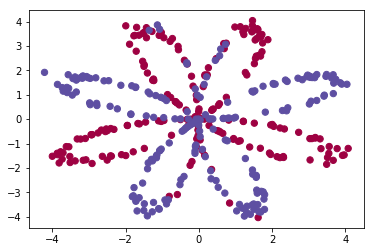

In [5]:
plt.scatter(X[0, :], X[1, :], c=np.squeeze(Y), s=40, cmap=plt.cm.Spectral)

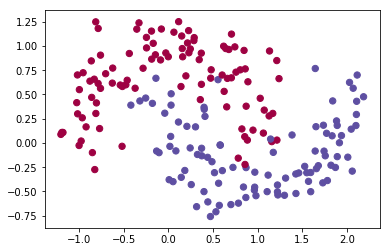

In [90]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "noisy_moons"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=np.squeeze(Y), s=40, cmap=plt.cm.Spectral)


In [91]:
shape_X = X.shape
shape_Y = Y.shape
m = X.shape[1]

print('The shape of X is:' + str(shape_X))
print('The shape of Y is:' + str(shape_Y))
print('I have m = %d training example!' %(m))

The shape of X is:(2, 200)
The shape of Y is:(1, 200)
I have m = 200 training example!


In [92]:
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

C:\APP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\APP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [93]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=np.squeeze(y), cmap=plt.cm.Spectral)

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


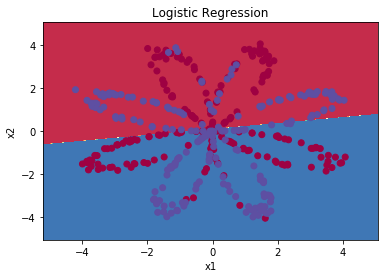

In [66]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")


In [67]:
def layer_sizes(X, Y):
    
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    
    return (n_x, n_h, n_y)


In [68]:
X_assess, Y_assess = layer_sizes_test_case()
print(X_assess, Y_assess)

[[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069   0.3190391 ]
 [-0.24937038  1.46210794 -2.06014071]
 [-0.3224172  -0.38405435  1.13376944]] [[-1.09989127 -0.17242821 -0.87785842]
 [ 0.04221375  0.58281521 -1.10061918]]


In [69]:
def initialize_parameters(n_x, n_h, n_y):
    
    W1 = np.random.randn(n_h, n_x)
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)
    b2 = np.zeros((n_y, 1))
    
    assert(W1.shape == (n_h, n_x))
    assert(W2.shape == (n_y, n_h))
    assert(b1.shape == (n_h, 1))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1":W1,
                 "b1":b1,
                 "W2":W2,
                 "b2":b2}
    
    return parameters


In [70]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print(parameters["W1"])
print(parameters["b1"])
print(parameters["W2"])
print(parameters["b2"])

[[ 1.14472371  0.90159072]
 [ 0.50249434  0.90085595]
 [-0.68372786 -0.12289023]
 [-0.93576943 -0.26788808]]
[[0.]
 [0.]
 [0.]
 [0.]]
[[ 0.53035547 -0.69166075 -0.39675353 -0.6871727 ]]
[[0.]]


In [71]:
def forward_propagation(X, parameters):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1,X.shape[1]))
    
    cache = {
        "Z1":Z1,
        "A1":A1,
        "Z2":Z2,
        "A2":A2
    }
    
    return A2,cache

In [72]:
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)

print(A2, cache)

[[0.21292656 0.21274673 0.21295976]] {'Z1': array([[ 1.7386459 ,  1.74687437,  1.74830797],
       [-0.81350569, -0.73394355, -0.78767559],
       [ 0.29893918,  0.32272601,  0.34788465],
       [-0.2278403 , -0.2632236 , -0.22336567]]), 'A1': array([[ 0.9400694 ,  0.94101876,  0.94118266],
       [-0.67151964, -0.62547205, -0.65709025],
       [ 0.29034152,  0.31196971,  0.33449821],
       [-0.22397799, -0.25730819, -0.2197236 ]]), 'Z2': array([[-1.30737426, -1.30844761, -1.30717618]]), 'A2': array([[0.21292656, 0.21274673, 0.21295976]])}


In [73]:
def compute_cost(A2, Y, parameters):
    
    m = Y.shape[1]
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1-A2), (1-Y))
    cost = -(1.0/m)*np.sum(logprobs)
    
    cost = np.squeeze(cost)
    
    assert(isinstance(cost, float))
    
    return cost
    

In [74]:
A2, Y_assess, parameters = compute_cost_test_case()

print(compute_cost(A2, Y_assess, parameters))

0.6930587610394646


In [75]:
def backward_propagation(parameters, cache, X, Y):
    
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    A1 = cache['A1']
    A2 = cache['A2']
    
    dZ2 = A2-Y
    dW2 = 1.0/m*np.dot(dZ2, A1.T)
    db2 = 1.0/m*np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2)*(1-np.power(A1, 2))
    dW1 = 1.0/m*np.dot(dZ1, X.T)
    db1 = 1.0/m*np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = {
        "dW1" : dW1,
        "db1" : db1,
        "dW2" : dW2,
        "db2" : db2
    }
    
    return grads

In [76]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()
grads = backward_propagation(parameters, cache, X_assess, Y_assess)
grads

{'dW1': array([[ 0.00301023, -0.00747267],
        [ 0.00257968, -0.00641288],
        [-0.00156892,  0.003893  ],
        [-0.00652037,  0.01618243]]), 'db1': array([[ 0.00176201],
        [ 0.00150995],
        [-0.00091736],
        [-0.00381422]]), 'dW2': array([[ 0.00078841,  0.01765429, -0.00084166, -0.01022527]]), 'db2': array([[-0.16655712]])}

In [77]:
def update_parameters(parameters, grads, learning_rate=1.2):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    parameters = {
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2
    }
    
    return parameters


In [78]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)
parameters

{'W1': array([[-0.00643025,  0.01936718],
        [-0.02410458,  0.03978052],
        [-0.01653973, -0.02096177],
        [ 0.01046864, -0.05990141]]), 'b1': array([[-1.02420756e-06],
        [ 1.27373948e-05],
        [ 8.32996807e-07],
        [-3.20136836e-06]]), 'W2': array([[-0.01041081, -0.04463285,  0.01758031,  0.04747113]]), 'b2': array([[0.00010457]])}

In [79]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost = False):
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for i in range(0, num_iterations):
        
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)
        
        if print_cost and i%1000 == 0:
            print("Cost after iteration %i:%f" %(i, cost))
    return parameters

In [80]:
X_assess, Y_assess = nn_model_test_case()
parameters = nn_model(X_assess, Y_assess, 4, num_iterations = 10000, print_cost = True)
parameters

Cost after iteration 0:0.852062
Cost after iteration 1000:0.000276
Cost after iteration 2000:0.000138
Cost after iteration 3000:0.000092
Cost after iteration 4000:0.000069
Cost after iteration 5000:0.000055
Cost after iteration 6000:0.000046
Cost after iteration 7000:0.000039
Cost after iteration 8000:0.000034
Cost after iteration 9000:0.000031


{'W1': array([[ 1.89013628,  0.18709321],
        [ 0.23798491, -2.03597592],
        [-1.04316703,  1.41958912],
        [ 0.62435397, -1.611304  ]]), 'b1': array([[-0.14824489],
        [-0.1398845 ],
        [ 0.16640247],
        [-0.32055131]]), 'W2': array([[ 0.5559344 ,  2.87672606, -3.66654836,  3.9427129 ]]), 'b2': array([[0.39293102]])}

In [81]:
def predict(parameters, X):
    
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    
    return predictions

In [82]:
parameters, X_assess = predict_test_case()
predictions = predict(parameters, X_assess)
predictions

array([[ True, False,  True]])

Cost after iteration 0:0.770532
Cost after iteration 1000:0.262819
Cost after iteration 2000:0.249001
Cost after iteration 3000:0.242097
Cost after iteration 4000:0.237475
Cost after iteration 5000:0.234112
Cost after iteration 6000:0.231629
Cost after iteration 7000:0.229774
Cost after iteration 8000:0.228365
Cost after iteration 9000:0.227274


Text(0.5, 1.0, 'Decision Boundary for hidden layer size4')

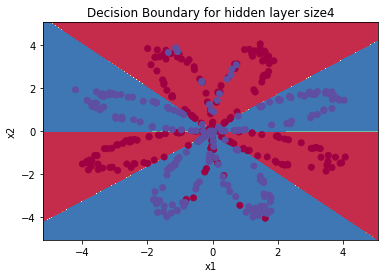

In [83]:
parameters = nn_model(X, Y, n_h =4, num_iterations = 10000, print_cost = True)

plot_decision_boundary(lambda x : predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size" + str(4))

Accuracy for 1 hidden units:66.25%
Accuracy for 2 hidden units:64.75%
Accuracy for 3 hidden units:90.75%
Accuracy for 4 hidden units:90.75%
Accuracy for 5 hidden units:89.75%
Accuracy for 20 hidden units:90.75%
Accuracy for 50 hidden units:91.5%


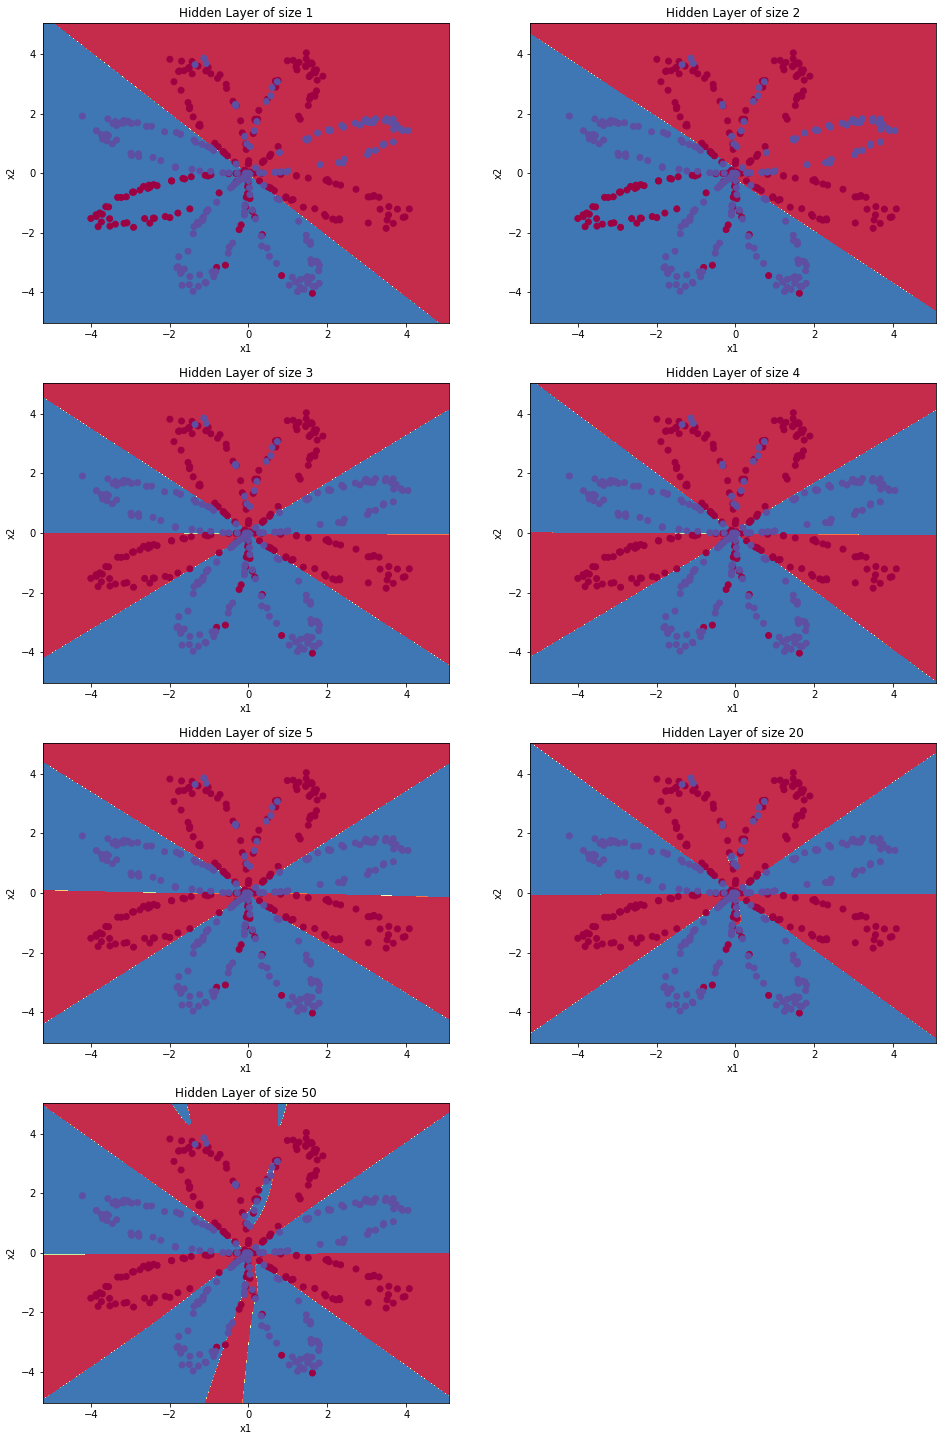

In [88]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title("Hidden Layer of size %d" % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x:predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1-Y, 1-predictions.T))/float(Y.size)*100)
    print("Accuracy for {} hidden units:{}%".format(n_h, accuracy))